In [39]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from matplotlib import cm

In [40]:
X = 4 * np.random.rand(100, 1)
y = 10 + 2 * X + np.random.randn(100, 1)

In [41]:
def h(x, theta):
    pred = np.dot(x,theta.reshape(x.shape[1],1))
    return pred

# a = h(X, y)
# print(a)

In [42]:
def mean_squared_error(y_predicted, y_label):
    return np.sqrt(((y_predicted - y_label) ** 2).mean())

# a = mean_squared_error(X, y)
# print(a)

In [43]:
class LeastSquaresRegression():
    def __init__(self,):
        self.theta_ = None



    def fit(self, X, y):
        # Calculates theta that minimizes the MSE and updates self.theta_
        self.theta_ = np.dot((np.dot(np.linalg.inv(np.dot(X.T,X)),X.T)),y)




    def predict(self, X):
        # Make predictions for data X, i.e output y = h(X) (See equation in Introduction)
        return h(X,self.theta_)



def bias_column(X):
    return np.c_[np.ones((X.shape[0],1)),X]

X_new = bias_column(X)

In [44]:
print(X[:5])
print(" ---- ")
print(X_new[:5])
model = LeastSquaresRegression()
model.fit(X_new, y)
print(model.theta_)
y_new = model.predict(X_new)

[[1.99179716]
 [2.3927083 ]
 [2.62532789]
 [1.01496093]
 [2.26487638]]
 ---- 
[[1.         1.99179716]
 [1.         2.3927083 ]
 [1.         2.62532789]
 [1.         1.01496093]
 [1.         2.26487638]]
[[9.96822859]
 [2.02540767]]


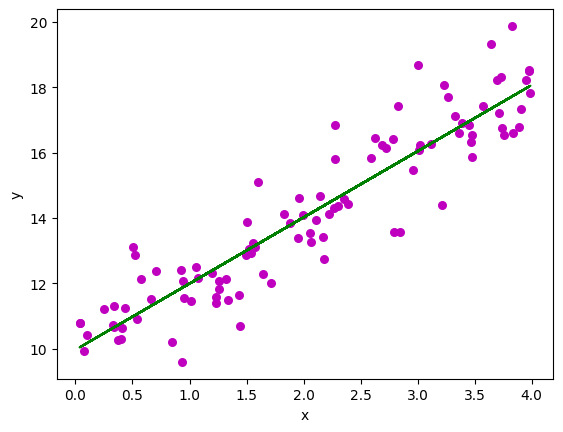

None


In [45]:
def my_plot(X, y, y_new):
    plt.scatter(X, y, color = "m",
               marker = "o", s = 30)

    # plotting the regression line
    plt.plot(X, y_new, color = "g")

    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')

    # function to show plot
    plt.show()
    # plt.savefig('my_linear_regression.png')

print(my_plot(X, y, y_new))

In [46]:
class GradientDescentOptimizer():

    def __init__(self, f, fprime, start, learning_rate = 0.1):
        self.f_      = f                       # The function
        self.fprime_ = fprime                  # The gradient of f
        self.current_ = start                  # The current point being evaluated
        self.learning_rate_ = learning_rate    # Does this need a comment ?

        # Save history as attributes
        self.history_ = [start]

    def step(self):
        # Take a gradient descent step
        # 1. Compute the new value and update selt.current_
        # 2. Append the new value to history
        # Does not return anything
        new_value = self.current_ - (self.learning_rate_ * fprime(self.current_))
        self.current_ = new_value
        self.history_.append(self.current_)
        # print(self.current_)
        return


    def optimize(self, iterations = 100):
        # Use the gradient descent to get closer to the minimum:
        # For each iteration, take a gradient step
        for i in range(iterations):
            self.step()
        return



    def getCurrentValue(self):
      # Getter for current_
      self.current_

    def print_result(self):
        print("Best theta found is " + str(self.current_))
        print("Value of f at this theta: f(theta) = " + str(self.f_(self.current_)))
        print("Value of f prime at this theta: f'(theta) = " + str(self.fprime_(self.current_)))

In [47]:
def f(x):
    return -np.exp(-(x - 0.7)**2)


def fprime(x):
    fp = 2*x - np.array([4, 12])
    return fp

In [48]:
grad = GradientDescentOptimizer(f, fprime, np.random.normal(size=(2,)), 0.1)
grad.optimize(10)
grad.print_result()

Best theta found is [1.93131209 5.35069505]
Value of f at this theta: f(theta) = [-2.19560058e-01 -4.04259359e-10]
Value of f prime at this theta: f'(theta) = [-0.13737581 -1.2986099 ]


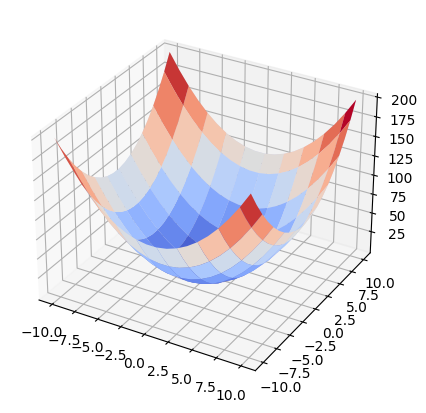

In [49]:
a = np.linspace(-10, 10, 20)
b = np.linspace(-10, 10, 20)
X, Y = np.meshgrid(a, b)

Z = X**2 + Y**2
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, color='b', alpha=0.1)

surface = ax.plot_surface(X, Y, Z,
                        cmap=cm.coolwarm,
                        rstride = 2,
                        cstride = 2)

plt.show()
# print(plt.savefig('function_f_in_3D_1.png'))

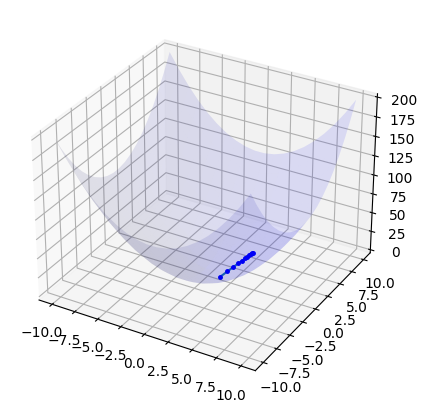

In [50]:
a = np.linspace(-10, 10, 20)
b = np.linspace(-10, 10, 20)
X, Y = np.meshgrid(a, b)

Z = X**2 + Y**2
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, color='b', alpha=0.1)
ax.plot([t[0] for t in grad.history_], [t[1] for t in grad.history_] , markerfacecolor='b', markeredgecolor='b', marker='.', markersize=5)
plt.show()
# print(plt.savefig('function_f_in_3D_2.png'))